In [45]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data_classification_for_task.csv")

In [3]:
df.head()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE         303 non-null    int64  
 1   GENDER      303 non-null    int64  
 2   FEATURE_1   303 non-null    int64  
 3   FEATURE_2   303 non-null    int64  
 4   FEATURE_3   303 non-null    int64  
 5   FEATURE_4   303 non-null    int64  
 6   FEATURE_5   303 non-null    int64  
 7   FEATURE_6   303 non-null    int64  
 8   FEATURE_7   303 non-null    int64  
 9   FEATURE_8   303 non-null    float64
 10  FEATURE_9   303 non-null    int64  
 11  FEATURE_10  303 non-null    int64  
 12  FEATURE_11  303 non-null    int64  
 13  TARGET      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


В прошлом датасете категориальные переменные жили в тествовм формате. 
Тогда будем воспринимать все переменные закодированные числом, как числовые

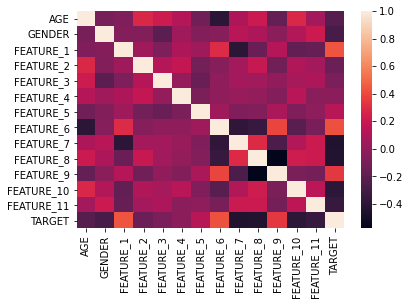

In [6]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
df["TARGET"].value_counts()

1    165
0    138
Name: TARGET, dtype: int64

In [15]:
X, y = df.drop(["TARGET"], axis=1), df["TARGET"]

(303,)

Таргет вполне сбалансирован. Посмотрим влияние факторов на него

Feature: 0, Score: -0.66001
Feature: 1, Score: -1.30873
Feature: 2, Score: 1.88826
Feature: 3, Score: -0.91185
Feature: 4, Score: -0.55727
Feature: 5, Score: 0.05664
Feature: 6, Score: 0.61362
Feature: 7, Score: 1.41770
Feature: 8, Score: -1.03203
Feature: 9, Score: -1.70325
Feature: 10, Score: 1.16400
Feature: 11, Score: -2.07696
Feature: 12, Score: -1.64565


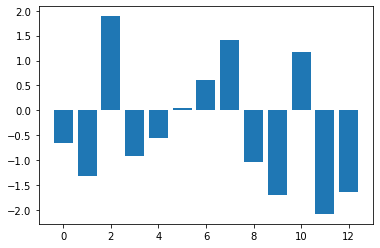

In [40]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

model = LogisticRegression(random_state=42)
model.fit(X, y)


importance = model.coef_[0]


for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Важности несколько пересчитались по сравнению с прямыми корреляциями. В логистической регрессии по дефолту стоит L2-регуляризация

Побьём данные на тренировочную и тестовую выборку. Поставим True для stratify, как если бы у нас был несбалансирован таргет

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [42]:
y_train.value_counts()

1    111
0     92
Name: TARGET, dtype: int64

In [43]:
y_test.value_counts()

1    54
0    46
Name: TARGET, dtype: int64

Нормально

In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.8103448275862069